## Data Preparation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

sns.set_theme(style="whitegrid")

# Load the dataset
data = pd.read_csv('customer_segmentation_data.csv')

data.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [7]:
# Data Cleaning: Handling missing values and converting relevant columns to appropriate data types
data = data.dropna()  # Dropping rows with missing values

# Converting columns to appropriate data types
data['Coverage Amount'] = pd.to_numeric(data['Coverage Amount'], errors='coerce')
data['Premium Amount'] = pd.to_numeric(data['Premium Amount'], errors='coerce')
data['Income Level'] = pd.to_numeric(data['Income Level'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Normalization: Standardizing numeric attributes for consistent analysis
scaler = StandardScaler()
data[['Coverage Amount', 'Premium Amount', 'Income Level']] = scaler.fit_transform(data[['Coverage Amount', 'Premium Amount', 'Income Level']])

# Encoding: Transforming categorical variables into numeric formats for correlation and clustering analyses
label_encoders = {}
categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 
                       'Behavioral Data', 'Interactions with Customer Service', 'Insurance Products Owned', 
                       'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 
                       'Preferred Language', 'Segmentation Group']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

display(data.head())

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,0,1,0,22,3,-0.333617,4,04-10-2018,4,1,-0.469361,-0.213640,2,0,1,0,0,4
1,95568,26,1,4,2,10,5,-0.780348,4,11-06-2018,0,0,1.071729,-0.822588,2,2,1,3,1,4
2,10544,29,0,3,0,27,3,-0.241996,4,06-05-2021,1,2,1.048219,1.080474,2,0,2,2,2,2
3,77033,20,1,0,1,28,3,-0.528975,4,09-02-2018,0,1,1.099966,1.025256,1,4,1,1,1,2
4,88160,25,0,2,1,34,5,-1.199821,0,09-10-2018,0,3,-0.469722,-1.359210,1,0,4,4,0,1


## Exploratory Data Analysis (EDA)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


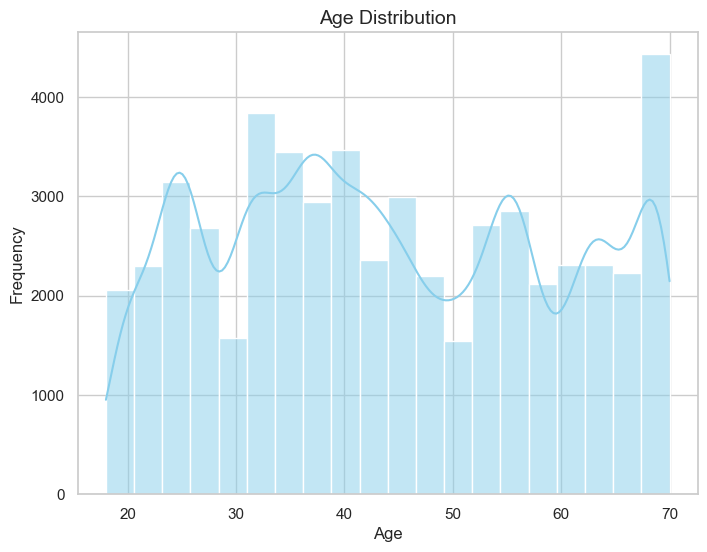

In [8]:
# Plot distribution of customers based on age without normalization
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

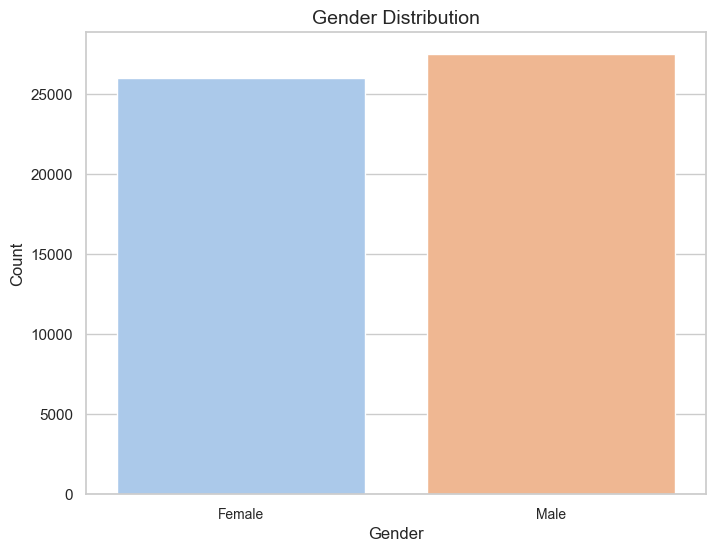

In [9]:
# Plot distribution of customers based on gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=10)
plt.show()

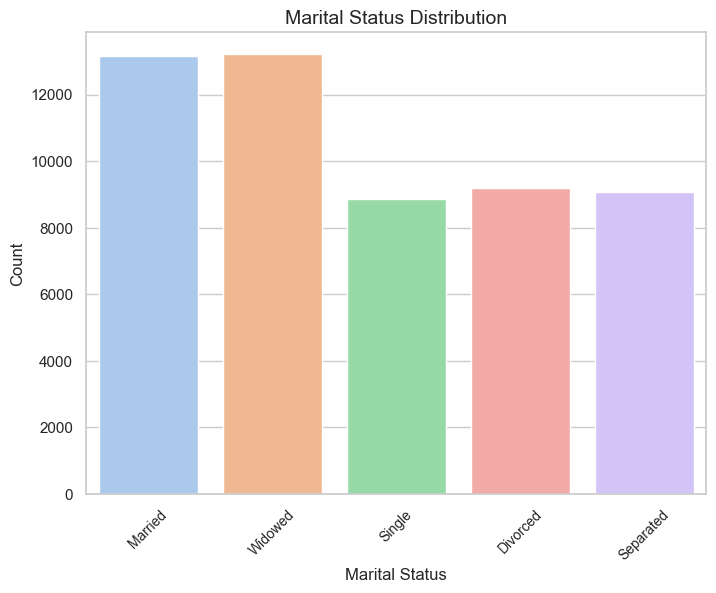

In [10]:
# Dictionary to map encoded values to original Marital Status values
marital_status_labels = {0: 'Married', 1: 'Widowed', 2: 'Single', 3: 'Divorced', 4: 'Separated'}

# Plot distribution of customers based on marital status
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', data=data, palette='pastel')
plt.title('Marital Status Distribution', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=list(marital_status_labels.keys()), labels=list(marital_status_labels.values()), rotation=45, fontsize=10)
plt.show()

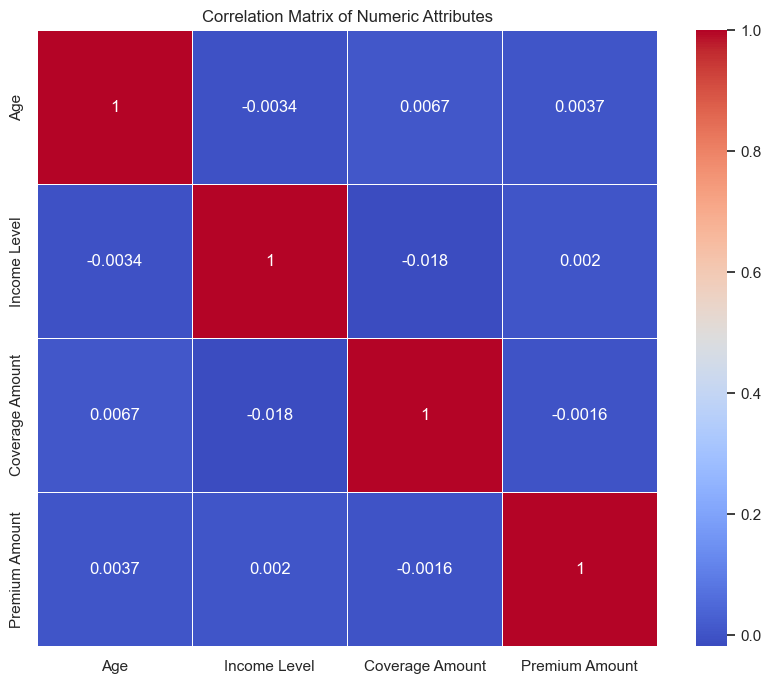

In [11]:
# Convert relevant columns to numeric types for correlation analysis
data['Coverage Amount'] = pd.to_numeric(data['Coverage Amount'], errors='coerce')
data['Premium Amount'] = pd.to_numeric(data['Premium Amount'], errors='coerce')
data['Income Level'] = pd.to_numeric(data['Income Level'], errors='coerce')

# Compute the correlation matrix
correlation_matrix = data[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Attributes')
plt.show()